<h1 style="color: #191970;" ><center>Machine Learning On The Wisconsin Breast Cancer Dataset</center></h1>

<h2 style="color:#4169E1;"> The Dataset Overview </h2>

The Wisconsin breast cancer dataset is the dataset that we have to investigate for this project. There are two variants of this dataset, the original one or the diagnostic one, I chose to use the original one. The dataset provides us with information on breast cancer tumors, it contains measurements recorded for 10 different features that tumors portray. The aim of the dataset is to classify what type of tumor a set of featues describe. The tumors have 2 possible labels, benign or malignant. Benign tumors are less serious than malignant, they tend to stay in place rather than spread out. They grow slowly overtime and often can be safely removed. Malignant are more serious cancerous tumors that can spread out to other parts in your body making them more difficult to treat.[1][11][12]

The features measured in this dataset are charactaristics of the cell nuclei present in the tumor. The measurement are taken from inserting a needle tip into the breast mass and taking a digital image. The dataset has 10 attributes and 1 classifier.[1]
<h5><center>The Dataset</center></h5>

1. <b>Sample Code Number</b>(int) - Id number
2. <b>Clump Thickness</b>(int) - 1-10
3. <b>Uniformity Of Cell Size</b>(int) - 1-10
4. <b>Uniformity Of Cell Shape</b>(int) - 1-10
5. <b>Marginal Adhesion</b>(int) - 1-10
6. <b>Single Epithelial Cell Size</b>(int) - 1-10
7. <b>Bare Nuclei</b>(int) - 1-10
8. <b>Bland Chromatin</b>(int) - 1-10
9. <b>Normal Nucleoli</b>(int) - 1-10
10. <b>Mitoses</b>(int) - 1-10
11. <b>Class</b>(int) - (2 = Benign , 4= Malignant)

I found my dataset on a website called [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). It can also be found on [Kaggle](https://www.kaggle.com/datasets/ninjacoding/breast-cancer-wisconsin-benign-or-malignant).[11][12]

<h2 style="color:#4169E1;"> Literature Review On Machine Learning Classifiers </h2> 

The research paper I studied to provide analysis for this section of the project was called "Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques". This research paper looks at five types of machine learning classifiers and how well they perform on the Wisconsin breast cancer dataset.These classification algorithms are all supervised learning algorithms because they take in lablled data to learn and decipher how these inputs are distinguished from one another so that it can then estimate new input data. Below I have given an overall review on the 5 different classifiers they used.[1]

<h3> Decision Tree Classifier (J48)</h3>

The first classification algorithm we will look at that was applied to the Wisconsin breast cancer dataset is the J48 algorithm which is also called the decision tree classifier. This practical algorithm divides features into groups by generating decision trees from datasets. It is easy and fast to use and the resulting output is comprehensible. 

This algorithm uses two concepts to create a decision tree, entropy and information gain. Entropy measures the impurity of a set, it assigns high uncertainty values to outcomes with low probability and low uncertainty values to outcomes with high probability. The information gain of an attribute is the reduction in entropy from partitioning the data according to an attribute. This helps partition the nodes of the tree by making the attribute with the highest information gain the root node and so on as you progress down the tree, the information gain of the attributes decreases, until there is no attributes left then we finish with the leaf nodes. Information gain has some drawbacks for example it tends to favour attributes that can take on a large number of different values. An alternative is the information gain ratio. 

There are some issues with decision tree learning such as a decision tree cannot consider relationships between two attributes and it doesn’t deal well with “noisy” data, missing attributes. The hypothesis found is sensitive to the training set. If you were to replace some training set data with new ones, the new one would be consistent with the original tree. Modifications to reduce this instability would be to alter the attribute selection procedure so that it is less sensitive to some of the training set data being replaced. [1][2][3]

<h3>Naïve Bayes</h3>

The second classification algorithm we will discuss that was applied to the dataset is Naïve Bayes algorithm. This algorithm is based around Bayes Theorem which calculates the probability of an event occurring based on prior knowledge that represents uncertainty before seeing any data. This theorem uses conditional probability which means events are mutually exclusive and can’t occur together i.e every attribute in the dataset is treated as independent of each other, knowing the Clump Thickness value of a tumor gives us no information on its Marginal Adhesion and vice versa. This assumption is why the algorithm is known as “naïve”. The other assumption with this algorithm is that every attribute is equal, all of them combined make an accurate output. There is no attribute with greater importance than the other attributes like we saw in the J48 algorithm. 

The process of this algorithm starts by analysing the data in a frequency table. Then you plug in the data to bayes theorem to get the posterior which is the probability distribution that represents uncertainty after seeing the data. The attribute with the highest posterior decides the outcome of prediction, this creates a classifier model. Naïve Bayes is much more faster than other algorithms and can be applied to smaller training sets. When its assumption of independence holds, it performs much better than other models. However in real life most attributes are dependent on each other so this would decrease the accuracy in its performance. An example of the use of this algorithm in the real world is in spam filtering where it identifies spam in your email.[1][13][14][15]

<h3> Multilayer Perceptron </h3>

The third algorithm mentioned in this research paper is multilayer perceptron. This algorithm has a structure of three main layers, the input layer, the hidden layer and the output layer. A dataset is processed through this algorithm by passing into the input layer first then the hidden layer and finally through the output layer. 

A Multilayer Perceptron(MLP) is a neural network and each neuron has inputs that are weighted. Each of these weights are given values, the larger the values the more complicated the network therefore it is favourable to keep the values small. The weights are adjusted during training after the actual results are compared with the expected results to try get them as close as possible. The hidden layer and output layer are where most of the computations occur in this approximation function. MLP’s have an activation function that is used to map the weighted inputs to outputs of the network.[1][4]

<h3> K-Nearest Neighbor(KNN) </h3>

K-Nearest Neighbors is another classification algorithm looked at in this research paper. This algorithm is easy to use and implement. The methodology of KNN is to measure similarity between all the data points in a dataset. To visualise this concept, imagine you plot all the data on a graph and then you used a distance metric to calculate the distance between each data point from another. Then you chose how many clusters you want the data to be grouped into and the algorithm assigns each data point a cluster based on how similar it is to other data points in that cluster. For example if cluster 1 has data points with "Clump Thickness" of around 7/8 then a data point with a "Clump Thickness" of value 8 would be put into the same cluster but of it had a value of 5 it would be put in a different cluster.

KNN is a versatile algorithm as it can be used in both classification and regression. However it proves to be impractical when dealing with a larger number of data as it slows down in comparison to other algorithms. An example of KNN applications in the real world would be when Netflix recommends movies to a user based on previous movies the user has watched and enjoyed, it searches for similar movies.[1][16]

<h3> Support Vector Machine(SVM) </h3>

The final classification algorithm we will discuss is the Support Vector Machine(SVM) algorithm. This machine learning algorithm produced the most accurate results in this research paper. The algorithm splits up the data points using hyperplanes with n-dimensions where n is the number of classifiers the dataset has. Since our dataset has two classification types, benign or malignant then our hyperplane will be 2 dimensional(a line). It aims to get the largest possible margin between different target classes i.e the maximum space between the location of the different types of classification outputs.

This supervised learning algorithm uses the pre-labelled dataset to plot all the data points and find the optimal hyperplane. The performance of this algorithm depends on how optimal the hyperplane is. Data points that are closest to the margin are called support vectors and they are used create the hyperplane and decide on how to get the maximum margin. SVM is a high performing algorithm especially with a large margin however it does not perform well with small margins as it makes it hard to distinguish between different classes.[1][17][18]

***

<h2 style="color:#4169E1;"> Statistical Analysis Of The Dataset </h2>

In [2]:
#Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Read in csv file containing the data
dataset = pd.read_csv("breast-cancer-wisconsin.csv",encoding='latin1')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


First we need to remove missing values from the dataset. In the documentation provided with the dataset it was noted that there were 16 missing values under the Bare Nuclei column therefore I have decided to locate these rows and delete that entire row to prevent these missing values from causing bias or effecting accurate results.

In [4]:
#Find the rows where Bare Nuclei is equal to ?
missing_values=dataset.loc[dataset.loc[:,'Bare Nuclei']=='?']
missing_values

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [5]:
#remove rows containing missing values
dataset.drop([23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617], axis=0, inplace=True)

In [6]:
#check the Bare Nuclei column now
dataset.loc[:,'Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 683, dtype: object

The Bare Nuclei column now has 683 rows after we deleted the missing value rows but the column has data type object. We need to change this in order to be able to do statistical analysis on the column.[7][8]

In [7]:
#change column to type int 
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int')

In [8]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Using the .describe() function we get the statistics table above from which we can gain useful information about the dataset.

The "count" row shows us the number of rows under each column, the "mean" gives us the average value, "std" stands for standard deviation of values in each column, "min" shows the smallest value recorded, "25%" and "50%" and "75%" are all percentiles where "50%" is also called the median and lastly "max" stands for the largest value in each column.

This summary of the dataset tells us there are 683 rows under each column therefore there are no values missing.

In [9]:
#dataset.loc locates all the columns where class is equal to 2
benign=dataset.loc[dataset.loc[:,'Class']==2]
benign.count()

Sample code number             444
Clump Thickness                444
Uniformity of Cell Size        444
Uniformity of Cell Shape       444
Marginal Adhesion              444
Single Epithelial Cell Size    444
Bare Nuclei                    444
Bland Chromatin                444
Normal Nucleoli                444
Mitoses                        444
Class                          444
dtype: int64

In [10]:
#dataset.loc locates all the columns where class is equal to 4
malignant=dataset.loc[dataset.loc[:,'Class']==4]
malignant.count()

Sample code number             239
Clump Thickness                239
Uniformity of Cell Size        239
Uniformity of Cell Shape       239
Marginal Adhesion              239
Single Epithelial Cell Size    239
Bare Nuclei                    239
Bland Chromatin                239
Normal Nucleoli                239
Mitoses                        239
Class                          239
dtype: int64

Using the functions .loc and .count() we can see there are 444 rows of the dataset where class equals 2 which stands for the benign tumors. There are 239 cases where the tumor is malignant. We can do a quick check to make sure that all the benign rows contain only the value 2 and all the malignant rows contain only the value 4 by using max and min functions. 

In [11]:
#get the max and min values for benign cases
print("The maximum and minimum values recorded in the Class column for benign cases are",
      benign['Class'].min(),"and",benign['Class'].max())

The maximum and minimum values recorded in the Class column for benign cases are 2 and 2


In [12]:
#get the max and min values for malignant cases
print("The maximum and minimum values recorded in the Class column for malignant cases are",
      malignant['Class'].min(),"and",malignant['Class'].max())

The maximum and minimum values recorded in the Class column for malignant cases are 4 and 4


In [13]:
#get the mean values for benign tumors
#numeric_only=True stops the function producing a warning [5]
#round(,2) round results to 2 decimal places [6]
round(benign.mean(numeric_only=True),2)

Sample code number             1115261.01
Clump Thickness                      2.96
Uniformity of Cell Size              1.31
Uniformity of Cell Shape             1.41
Marginal Adhesion                    1.35
Single Epithelial Cell Size          2.11
Bare Nuclei                          1.35
Bland Chromatin                      2.08
Normal Nucleoli                      1.26
Mitoses                              1.07
Class                                2.00
dtype: float64

In [14]:
#get the mean values for malignant tumors
#numeric_only=True stops the function producing a warning [5]
#round(,2) round results to 2 decimal places [6]
round(malignant.mean(numeric_only=True),2)

Sample code number             1005121.44
Clump Thickness                      7.19
Uniformity of Cell Size              6.58
Uniformity of Cell Shape             6.56
Marginal Adhesion                    5.59
Single Epithelial Cell Size          5.33
Bare Nuclei                          7.63
Bland Chromatin                      5.97
Normal Nucleoli                      5.86
Mitoses                              2.60
Class                                4.00
dtype: float64

In [15]:
#minus the means to look at the difference
difference=round(malignant[1:-1].mean(numeric_only=True),2) - round(benign.mean(numeric_only=True),2)
#get rid of columns that dont give us much information
difference.drop(['Sample code number ','Class'])

Clump Thickness                4.24
Uniformity of Cell Size        5.25
Uniformity of Cell Shape       5.13
Marginal Adhesion              4.23
Single Epithelial Cell Size    3.21
Bare Nuclei                    6.28
Bland Chromatin                3.87
Normal Nucleoli                4.60
Mitoses                        1.55
dtype: float64

<h4>Analysis of the means</h4>
On intial observation of the mean values for all the attributes beloning to benign tumours vs. maligant tumours, it is clear that all values for malignant tumors are greater than for benign. This makes sense since malignant tumors grow uncontrollably and they spread to other parts of the body whereas benign tumors tend to stay put and not spread out while growing slowly over time. After calculating the difference in the means you can see the biggest difference is in the Bare Nuclei with a difference of 6.28. Perhaps this attribute is the easiest attribute to use to distinguish between the two types of tumor and also predict the type. The least obvious attribute appears to be mitosis with a difference of 1.55 so I would guess that this attribute doesn't have much influence/weight in the model used to predict the types of tumor.

In [16]:
#delete Sample code number and class column since they dont apply to this table
new_dataset=dataset.drop(['Sample code number '],axis=1)
#get the correlation between all the columns
new_dataset.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<h4>Relationships Between Attributes</h4>
The table above shows the correlation between each of the attributes. The two attributes with the strongest correlation are Uniformity of Cell Size and Uniformity of Cell Shape, they have a strong positive correlation of 0.907 which is very close to 1. The weakest relationship seems to be between Mitoses and Bare Nuclei with a correlation coefficient of 0.339. When analysing the difference between the means of the two types of tumour above I made an assumption that mitosis would have least weight when predicting tumors and this table helps confirm that assumption as all of the correlation coefficients belonging to mitosis with the other attributes appear to be quite weak. They are all under 0.5 suggesting that mitosis doesn't have much of an effect on the other values.

Sample code number column was removed since it tell us nothing about the type of tumor and also the class column is a result of all the attributes so we know it has a strong relationship with all variables but we can't measure the relationship properly since it has discrete values 2 or 4. Therefore Class column was removed aswell.

<Figure size 1800x360 with 0 Axes>

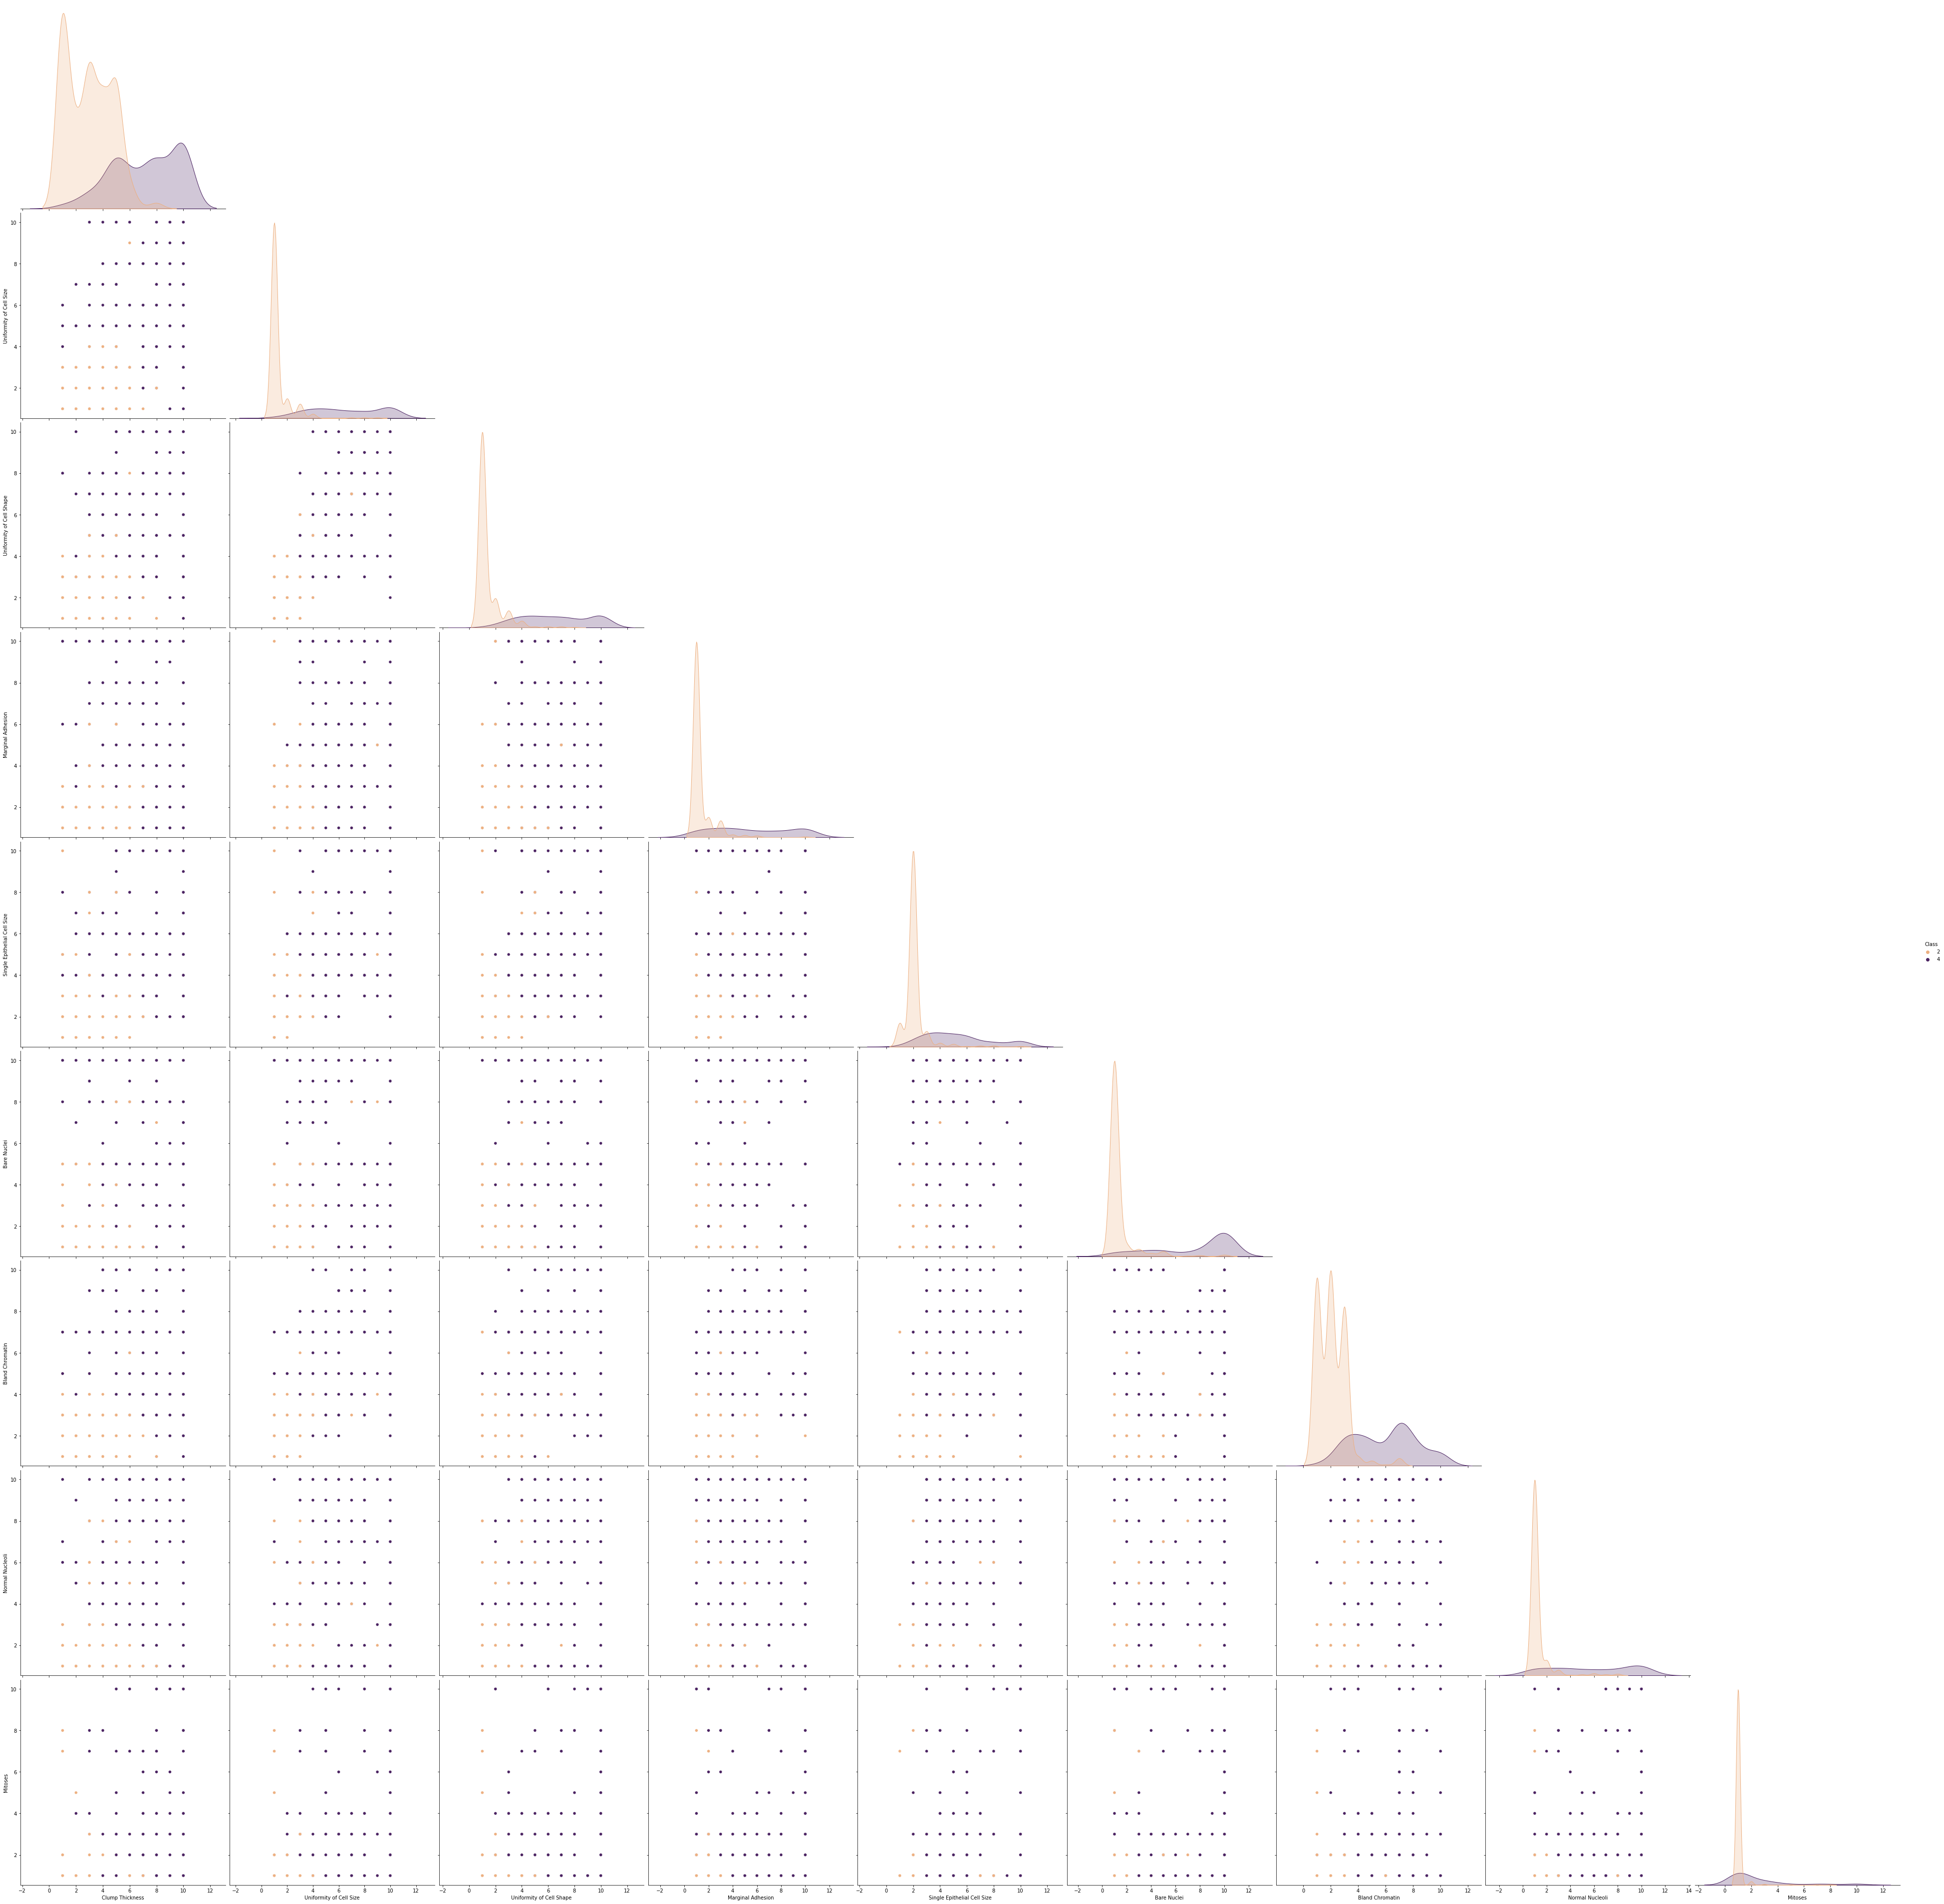

In [30]:
import seaborn as sns
plt.figure(figsize=(25,5))
sns.pairplot(new_dataset,hue='Class',height=6,corner=True, palette="flare")

***

<h2 style="color:#4169E1;"> Machine Learning Algorithms </h2>

Next we can look at some machine learning classifiers and train them on our wisconsin breast cancer dataset. Once the classification models are trained we can test the models using a test set that will be set aside from the dataset and we can see the accuracy at which our models performed.

<h4> Inputs/Outputs </h4>

First we must import packages we will need to use and then define what columns are the input values used to predict the chosen output and the output values which are the labels that classify the data points.

In [51]:
#import necessary packages 
import sklearn.neighbors as nei
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [52]:
#State the columns used as inputs - attributes and the column used as outputs -to classify the tumor
inputs=dataset[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
        'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
outputs=dataset['Class']

Next we will take out a proportion of the dataset and set it aside for testing before we start training our model. We do this because we want to test our model on data it has never seen before. For this model I chose to set aside 20% of the dataset for testing, I chose the parameter because the dataset needs to be trained using a good amount of data because when you take away too much data for testing you are missing out on valuable data that could help train the model and improve the accuracy so since this dataset is quite small I chose to use 80% for training. If I were to only use 10% for testing that would be too little to provide an accurate analysis of how well the model performed. Therefore I believe 80:20 is a good ratio.

In [53]:
#split dataset into train and test data
#test_size is how much of the dataset to set aside for testing which is set at 20% so 80% is used for training the model
#random_state = 10 means no. of shuffles- we will get the same results if we run this code again instead of resetting each time
#stratify = outputs means make sure the result produces the same proportion of malignant vs benign as in the original dataset
inputs, inputs_test, outputs, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=10, stratify=outputs)

<h3> K-Nearest Neighbors</h3>

<h4> Classifier </h4>

In [54]:
#use k-nearest neighbours scikit learn model and set n neighbours as 5
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [55]:
#fit out split dataset into the model
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [56]:
#model predictions on the input data
knn_predictions=knn.predict(inputs)

In [57]:
#check accuracy of our model on the test data
knn.score(inputs_test, outputs_test)

0.9781021897810219

The accuracy score we got was 0.9781 with the number of neighbors set to 5 which was a randomly chosen parameter. Next I decided to use GridSearch to find out what the best number for the n_neighbors parameter would be.[9]

In [44]:
#create new a knn model
new_knn = nei.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(new_knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs, outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [45]:
#check for the optimal n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 8}

In [46]:
#use k-nearest neighbours scikit learn model and set n neighbours as 9
knn = nei.KNeighborsClassifier(n_neighbors=8)

#enter split dataset into the model
knn.fit(inputs,outputs)

#check accuracy of our model on the test data
knn.score(inputs_test, outputs_test)

0.9714285714285714

The result I got was that the highest accuracy achieved was with 8 nearest neighbors and had a value of 0.9714. This seems to be inaccurate since the accuracy score I got with my first model was higher. So instead I decided to write a quick function that calculates the accuracy score of the model for the n_neighbor parameter equal to values 2-24 and outputs the accuracy score for each value into an array. We can then see which value produces the highest accuracy.

In [58]:
#for all values from 2 to 24
for i in range (1, 25):
    #empty array to fill with scores
    acc_score=[]
    # train and fit model to dataset
    knn = nei.KNeighborsClassifier(n_neighbors=i)
    knn.fit(inputs,outputs)
    score = knn.score(inputs_test, outputs_test)
    #add all scores to empty array
    acc_score.append(score)
    #print results
    print(acc_score, end=' ')

[0.9708029197080292] [0.948905109489051] [0.9708029197080292] [0.9708029197080292] [0.9781021897810219] [0.9781021897810219] [0.9708029197080292] [0.9781021897810219] [0.9781021897810219] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] [0.9781021897810219] [0.9708029197080292] [0.9781021897810219] [0.9708029197080292] [0.9781021897810219] [0.9708029197080292] [0.9708029197080292] [0.9708029197080292] 

The highest accuracy scores for n_neighbor parameter is 0.9781 so I will just use my first knn model with 5 nearest neighbors as my final model with an accuracy score of 0.9781.

<h3> Support Vector Machine </h3>

<h4> Classifier </h4>

In [72]:
#create model
svclassifier = SVC(kernel='linear')
svclassifier.fit(inputs, outputs)

SVC(kernel='linear')

In [73]:
#predict values
y_pred = svclassifier.predict(inputs)

In [74]:
#check accuracy of our model on the test data
svclassifier.score(inputs_test, outputs_test)

0.9857142857142858

After training and testing the support vector machine model on the data we get an accuracy score of 0.9857 which is very good. For this model I chose a linear kernel at random. Next I will look at the results for different values of the kernel parameter.[20][21]

In [92]:
#create an array of different kernels
kernel=['linear', 'poly', 'sigmoid']

#for each kernel in the array
for i in kernel:
    #empty array to fill with scores
    acc_score=[]
    #train the model on diff kernels
    svclassifier = SVC(kernel=i)
    svclassifier.fit(inputs, outputs)
    y_pred = svclassifier.predict(inputs)
    score=svclassifier.score(inputs_test, outputs_test)
    #append all the scores into the empty scores array
    acc_score.append(score)
    #print results
    print(acc_score, end=' ')

[0.9857142857142858] [0.9714285714285714] [0.5285714285714286] 

The linear kernel still seems to perform the best in comparison to polynomial and sigmoid. In order to test the radius basis function(rbf) kernel we need a gamma parameter and a C parameter. Gamma defines how far a training example reaches and C stands for the regularization parameter. A small value for C gives a larger margin and a large value for C gives a small margin.[19] 

In [90]:
#generate a range of c values
C_range = np.logspace(-2, 10, 13)
#generate a range of gamma values
gamma_range = np.logspace(-9, 3, 13)
#create a dictionary of all values we want to test for gamma and c
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(test_size=0.2, random_state=10)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(inputs, outputs)

print("The optimal parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_)
)

The optimal parameters are {'C': 0.1, 'gamma': 0.01} with a score of 0.98


In [87]:
svclassifier = SVC(kernel='rbf', C=0.1,gamma=0.01)
svclassifier.fit(inputs, outputs)
print("rbf kernel: ",svclassifier.score(inputs_test, outputs_test))

rbf kernel:  0.9857142857142858


In [89]:
svclassifier = SVC(kernel='sigmoid', C=0.1,gamma=0.01)
svclassifier.fit(inputs, outputs)
print("sigmoid kernel:",svclassifier.score(inputs_test, outputs_test))

sigmoid kernel: 0.6428571428571429


After testing the model with various options for the kernel parameter, it appears that both linear and radial basis function kernels perform the best as they both have an accuracy score of 0.9857.

<h3>Naïve Bayes</h3>

<h4>Classifier</h4>

In [98]:
#create and fit model
gnb = GaussianNB()
gnb.fit(inputs, outputs)

GaussianNB()

In [99]:
#predict values
y_pred = gnb.predict(inputs)

In [100]:
#check accuracy of our model on the test data
gnb.score(inputs_test, outputs_test)

0.9857142857142858

The naïve bayes model gave the same accuracy results the both the other two models achieved which was 0.9857. This is quite unusual and can only mean that I have overfitted my data because this is a very high score achieved exactly the same by the three models. When trying out different values for parameters some of the test data must have been leaked into the training set and the model was then never exposed to many inputs that it had never seen before.

After doing some research I found a method called cross validation that helps stop your models overfitting the data. This method shuffles the data and the training data is split into k groups(I split it into 10 folds), trainied on k-1 groups and the model is tested on the remaining group. The average accuracy score is calculated for each loop and the mean of the accuracy scores is returned.[22]

In [106]:
#[23] create an array of all the models and their parameters
models=[('KNN', nei.KNeighborsClassifier(n_neighbors=5)),(('SVM', SVC(kernel='rbf', C=0.1,gamma=0.01))),(('Naive Bayes', GaussianNB()))]

#loop through all the models and perform cross validation on the data before inserting it to the models
for name, model in models:
    #use 10 folds and set random state to get same results when rerun, shuffle the data
    kfold = KFold(n_splits=10, random_state=15,shuffle=True)
    #train the models using cross validation
    result = cross_val_score(model, inputs, outputs, cv=kfold, scoring='accuracy')
    #print the results
    print("%s: Mean Accuracy = %.2f%%" % (name, result.mean()*100))

KNN: Mean Accuracy = 96.75%
SVM: Mean Accuracy = 97.83%
Naive Bayes: Mean Accuracy = 97.09%


<h4>Results from the research paper "Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques"</h4>

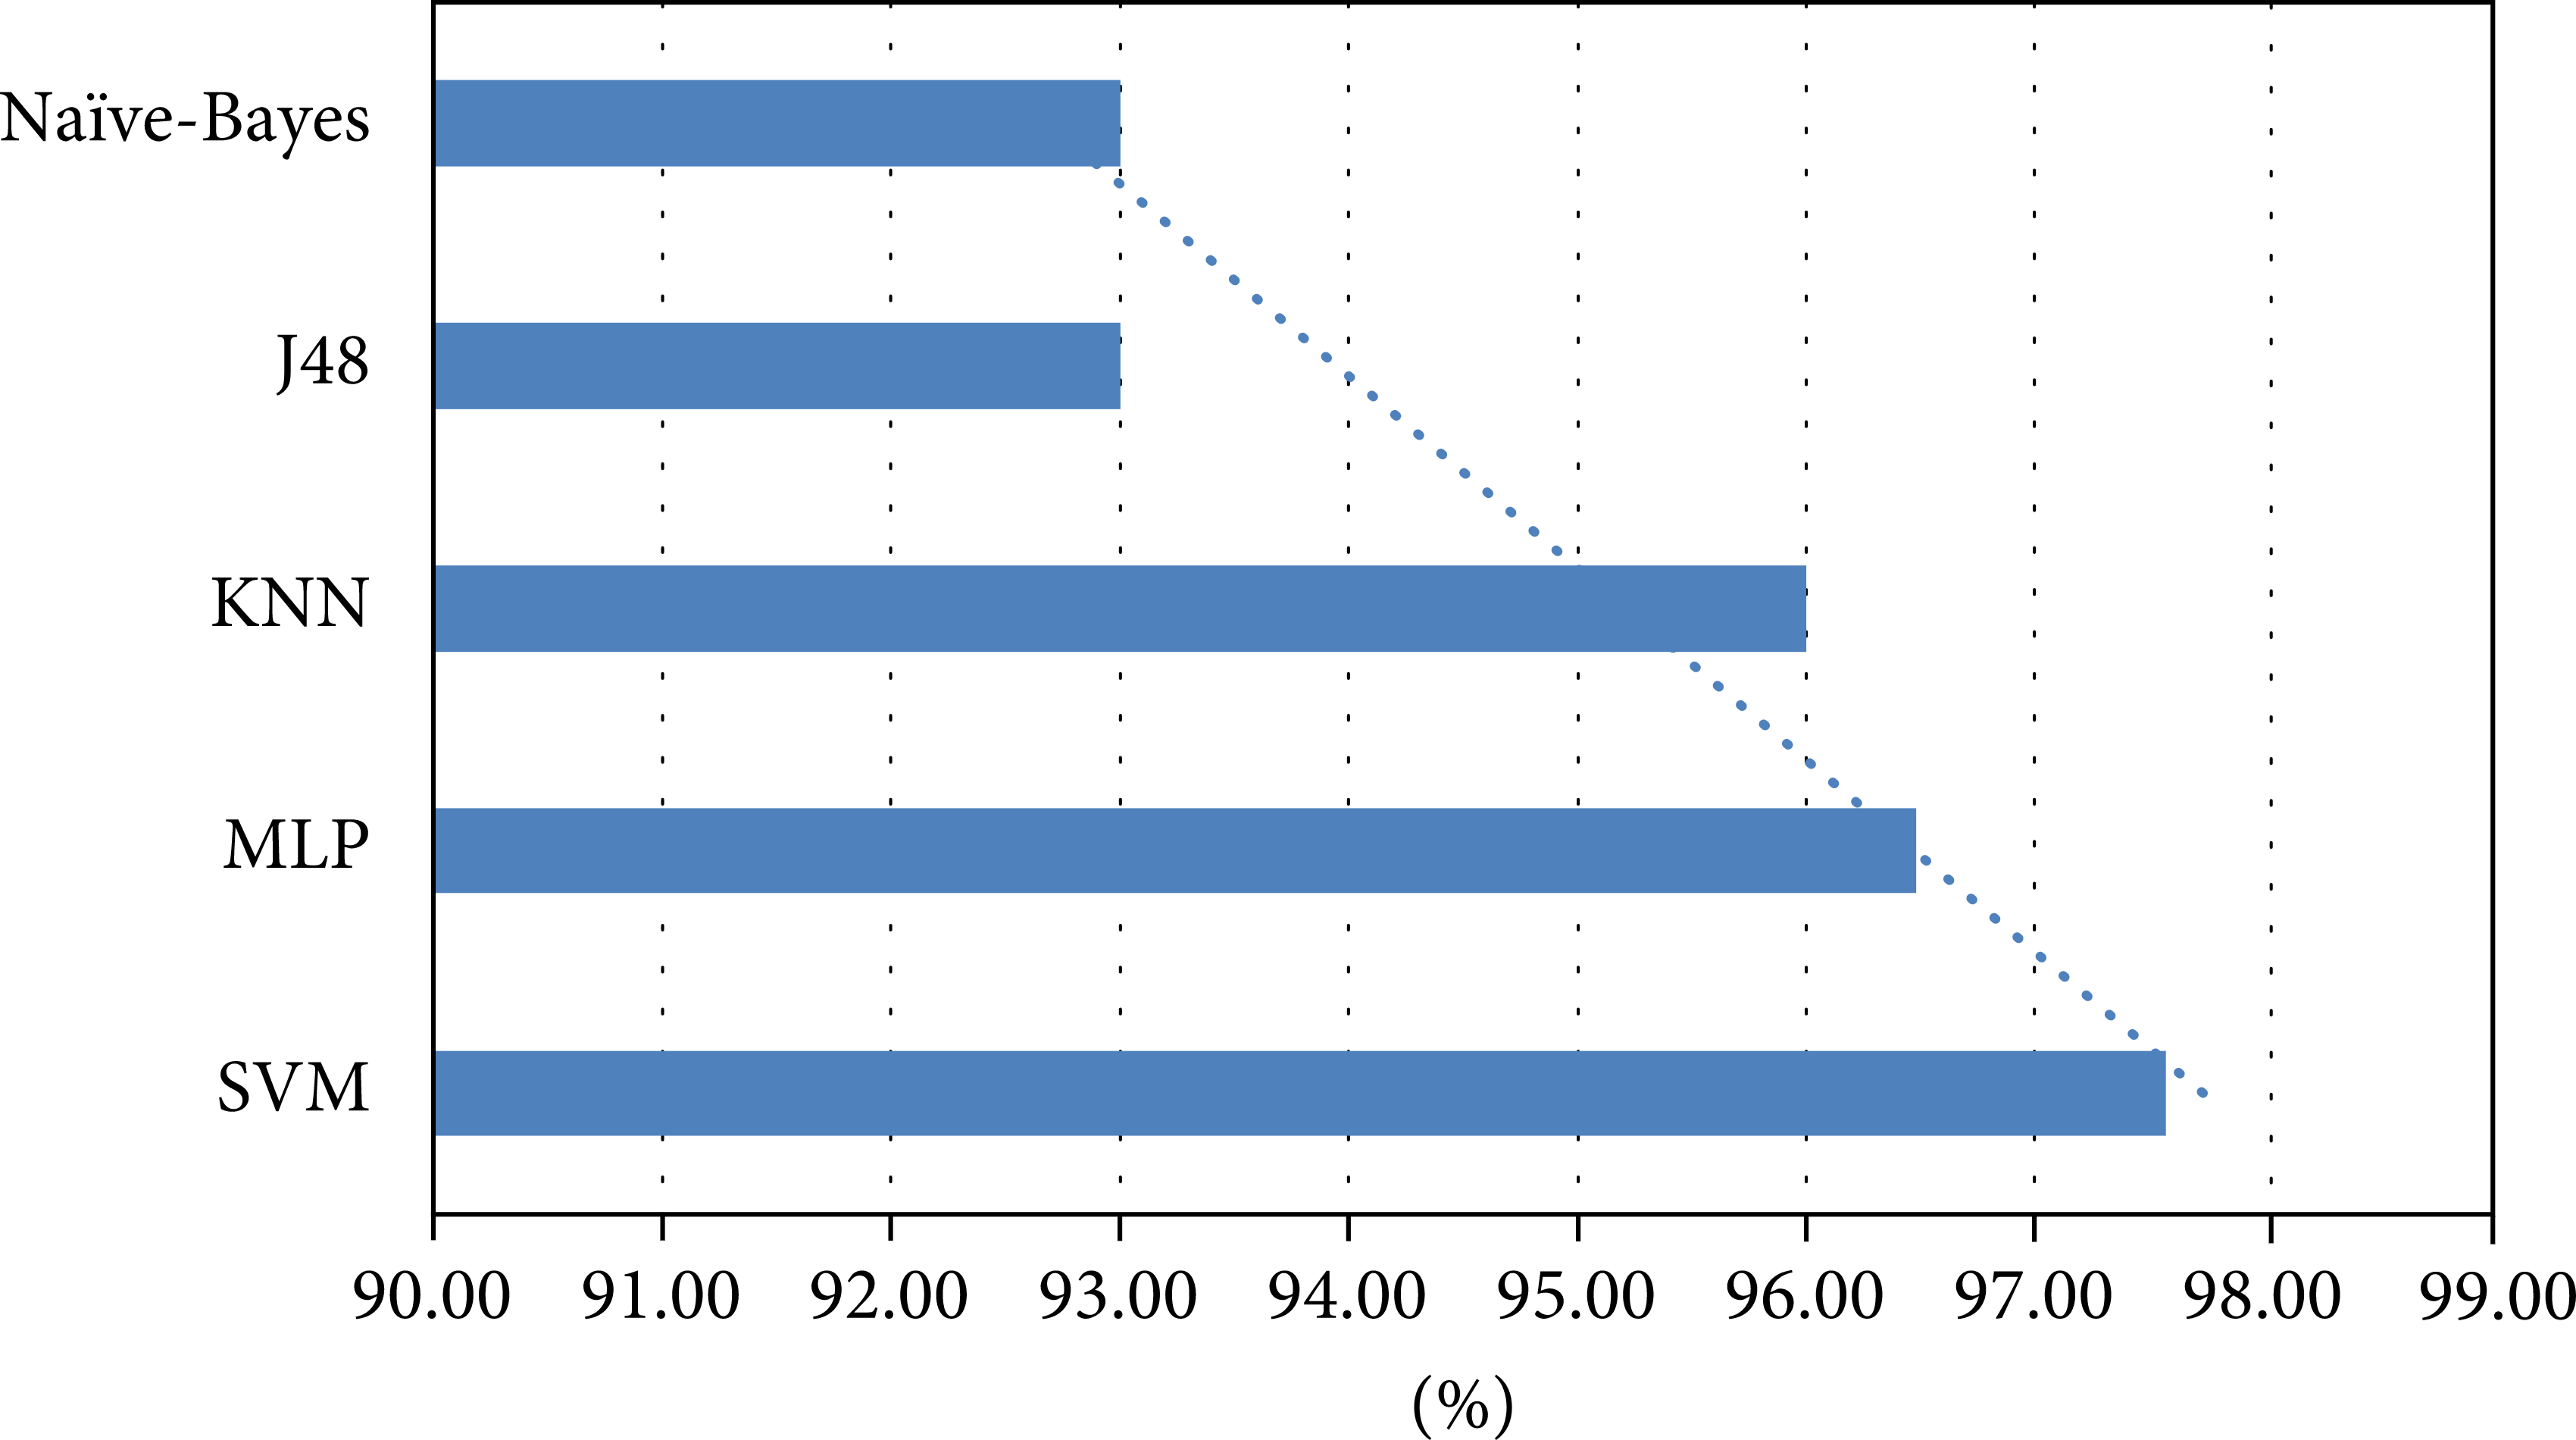

<h2 style="color:#4169E1;">Evaluation Of Results </h2>

The three models I have chosen perform very well on the Wisconsin breast cancer dataset. The Support Vector Machine model produced the highest accuracy score, similar to the research paper mentioned at the beginning of this project. SVM was followed by K-Nearest Neighbors and then the lowest accuracy score was achieved by the Naïve Bayes model. Even though the Naïve Bayes model performed quite well it was based on the assumption that the attributes were independent when we saw in the statistical analysis section that most are dependent on each other, this would make a less preferred classification model. 

Computing these test results was done fairly by using the same split for testing and for training. The same dataset and epoch were used to ensure an unbiased comparison. Furthermore, although cross-validation is a good way of estimating likely future performance of a model, to fully evaluate the models I believe we need a larger dataset to be able to train the models sufficiently while also have plenty of data to keep aside for further testing on unseen data.

In comparison to the results documented in the research paper I provided the literature review on, all three of my models outperformed the models in the paper. The research paper results are shown in the image above. Their Naive Bayes model performed 92.7% and mine had an accuracy score of 97.09%. Their KNN model got a score of 95.95% compared to mine that got 96.75%. Finally the top performing models in both cases was SVM which recieved a score of 97.72% in the research paper and mine got 97.83%.

<h2 style="color:#4169E1;"> Synthesising The Data </h2>

<h4>Why Synthesise Data</h4>

As I have previously stated this dataset is quite small which makes it difficult to train a model on. Not only is it small but the data is not very representative of both types of tumors as there are twice as many samples of benign tumors(444) than malignant(239) after the missing values are removed. This will lead to bias in the classification algorithms as they will pick up that approx 65% of the time the output will be benign. A solution to these issues would be to create more data by first generating more malignant samples and then increase the amount of both samples. We could then train our model on this new synthesised data. In this section I will discuss some ways in which you can synthesise data from a dataset you obtained, in python. 

It is also possible to synthesise data without having a dataset already but I won't be looking into these methods since it doesn't apply to this project.

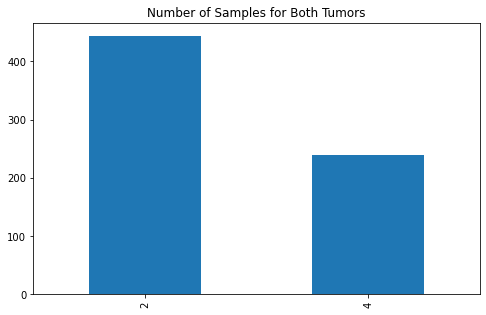

In [45]:
ax = dataset['Class'].value_counts().plot(kind='bar',figsize=(8,5),title="Number of Samples for Both Tumors")

<h4> Discussion On Different Methods</h4>

<h5>Numpy Random Number Generator</h5>
In order to synthesise new data we would need to generate some more samples with same distribution and properties as the original dataset. One way would be to use Numpy to generate some random samples by fitting a distribution to our dataset and using the mean and standard deviation of the dataset. Then we could input these new samples into our models and predict whether they are benign or malignant[24]. Another way to synthesise the dataset using Numpy could be to copy values in the dataset and use Numpy.random.normal(mean, sigma, features.shape) to generate new data with same feature dimensions as the original data[25].

<h5>Synthetic Data Vault</h5>
Another method I would while investigating data synthesis was using a package called Synthetic Data Vault(SDV). This python package is easy implement and to understand and handles any data very well even when there are missing values or different data types. The synthetic dataset will preserve the properties and statistics of the original dataset.[26] There are numerous models to choose from within this package and they can all be found in the single tables [documentation](https://sdv.dev/SDV/user_guides/single_table/models.html). The recommended model to use is the Tabular Preset model as it comes ready to use and you don't need to configure parameters.[27] After you choose your model there are three simple steps to follow 1.Initiate the model (Just call the function e.g TabularPreset()), 2. fit the model to your data using model.fit(data) and 3. create a sample using model.sample(no. of samples).

<h5>Gretel</h5>
Next we will discuss the python open source package Gretel. This package has a set of different modes, one of which is is a dataframe mode where we can synthesise data using our original dataframe. This mode works well with tables that have a large number of columns because it breaks up the dataframe into batches and trains a model on each of the batches. This package is more complicated than other ones we have looked at. Essentially the gretel package trains a model to fit all the batches of data and then it generates new lines of data for each batch. In the end all the batches are put back together into a single dataframe which is a mixture of synthesised data and the original data.[26][28][29]

## References

[1] https://www.hindawi.com/journals/abb/2022/6187275/ <br>
[2] https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1 <br>
[3] https://en.wikipedia.org/w/index.php?title=ID3_algorithm&oldid=970826747 <br>
[4] https://machinelearningmastery.com/neural-networks-crash-course/ <br>
[5] https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error <br>
[6] https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python <br>
[7] https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/#:~:text=Convert%20Column%20to%20int%20(Integer,int64%20%2C%20numpy. <br>
[8] https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/#:~:text=To%20drop%20a%20row%20or%20column%20in%20a%20dataframe%2C%20you,method%20in%20the%20docs%20here.&text=Rows%20are%20labelled%20using%20the,starting%20with%200%2C%20by%20default. <br>
[9] https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a<br>
[10] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
[11] https://www.kaggle.com/datasets/ninjacoding/breast-cancer-wisconsin-benign-or-malignant <br>
[12] https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)<br>
[13] https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/<br>
[14] https://www.geeksforgeeks.org/naive-bayes-classifiers/ <br>
[15] https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c<br>
[16] https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761<br>
[17] https://www.sciencedirect.com/topics/immunology-and-microbiology/support-vector-machine<br>
[18] https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 <br>
[19] https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#:~:text=This%20example%20illustrates%20the%20effect,high%20values%20meaning%20'close'.  <br>
[20] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html <br>
[21] https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python#rdl <br>
[22] https://scikit-learn.org/stable/modules/cross_validation.html<br>
[23] https://towardsdatascience.com/machine-learning-project-17-compare-classification-algorithms-87cb50e1cb60<br>
[24] https://github.com/MegTully/Programming-For-DA-Project/blob/main/Programming_For_DA_Project.ipynb <br>
[25] https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd<br>
[26] https://towardsdatascience.com/top-3-python-packages-to-generate-synthetic-data-33a351a5de0c<br>
[27] https://sdv.dev/SDV/user_guides/single_table/models.html<br>
[28] https://github.com/gretelai/gretel-synthetics/blob/master/examples/dataframe_batch.ipynb<br>
[29] https://pypi.org/project/gretel-synthetics/<br>